In [1]:
import scipy.io as spio
import numpy as np
import sys, os

import matplotlib.pyplot as plt
import math

In [2]:
def plot_results(noisy, nn_output, clean, title=None):
    import numpy as np
    plt.figure(1, figsize=(20,20))
    #if title: plt.suptitle(title, fontsize=16)

    ax = plt.subplot(1, 3, 1)
    ax.set_title("noisy")
    # ax.imshow(np.log10(noisy), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(noisy), interpolation='none')
        
    ax = plt.subplot(1, 3, 2)
    ax.set_title("Neural Nets")
    # ax.imshow(np.log10(nn_output), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(nn_output), interpolation='none')
    
    ax = plt.subplot(1, 3, 3)
    ax.set_title("clean")
    # ax.imshow(np.log10(clean), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(clean), interpolation='none')

    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.9, top=0.88, wspace=0.2, hspace=0.2)
    #plt.subplot_tool()
    plt.show()

In [3]:
def convert_data2org(cur_mat, maxV = 25.0):
    import numpy as np
    cur_mat = cur_mat * maxV
    x = np.exp(cur_mat) - 1.0

    neg_idx = x < 0.0
    x[neg_idx] = 0.0

    return x

In [4]:
snr_dir = '/drives/pangu1/users/leiming/files_on_pangu/spie_mcxdenosing/prepare_data/spie2d_customize/test_snr_case1/'

In [5]:
dirp7 = snr_dir + '1e+07'
dirp8 = snr_dir + '1e+08'

In [6]:
N, im_h, im_w = 100, 100, 100

raw_p7 = np.zeros((N, im_h, im_w))
raw_p8 = np.zeros((N, im_h, im_w))

In [7]:
#
# noisy /  clean data set
#
for i in xrange(1, 101):
    # p7
    file_name = dirp7 + '/test[X].mat'
    file_name = file_name.replace('[X]', str(i))
    noisymat = spio.loadmat(file_name, squeeze_me=True)
    noisyData = noisymat['currentImage']
    raw_p7[i-1, :,:] = noisyData
    
    # p8
    file_name = dirp8 + '/test[X].mat'
    file_name = file_name.replace('[X]', str(i))
    #print file_name
    noisymat = spio.loadmat(file_name, squeeze_me=True)
    noisyData = noisymat['currentImage']
    raw_p8[i-1, :,:] = noisyData    
    
    #break

In [8]:
# 
#NN model
#

nn_data = spio.loadmat('./test_snr_case1.mat', squeeze_me=True)
nn_data = nn_data['output_clean']
print nn_data.shape

nn_data_revert = convert_data2org(nn_data) # convert back to original format

(100, 100, 100)


In [9]:
nn_data_revert.shape

(100, 100, 100)

### plot all

test 0



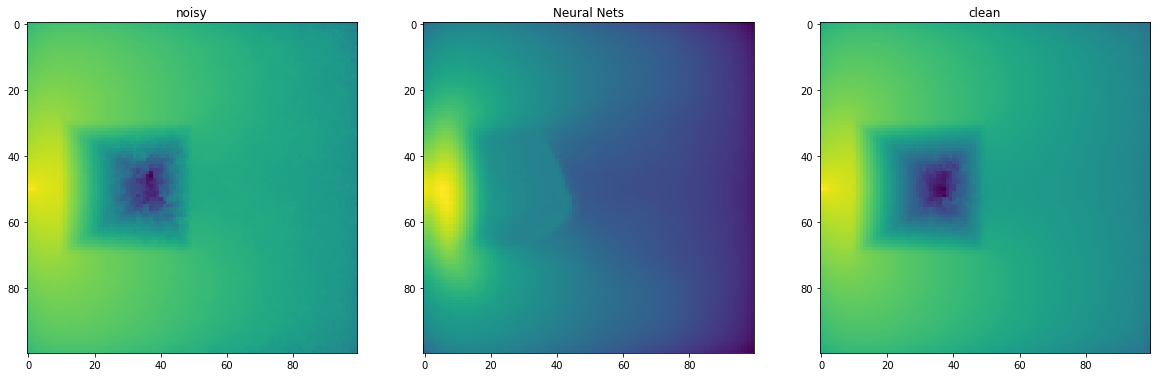

In [10]:
# plot_results

for i in xrange(N):
    noisy_img = raw_p7[i,:,:]
    clean_img = raw_p8[i,:,:]
    nn_output = nn_data_revert[i,:,:]
    # compare 3 figures
    print("test {}\n".format(i))
    plot_results(noisy_img, nn_output, clean_img)
    
    break